In [33]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [40]:
def create_blackbox(type, n):
    oracle_qc = QuantumCircuit(n+1)
    if type == "balanced":
        rdm_num = np.random.randint(1,2**n)
        print ("rdm_num"+str(rdm_num))
        rdm_str = format(rdm_num,'0'+str(n)+"b")
        print ("rdm_str"+str(rdm_str))
        
        for qubit in range(len(rdm_str)):
            if rdm_str[qubit] == '1':
                oracle_qc.x(qubit)
                
        print ("oracle_qc_after applying func :")
        print (oracle_qc)
           
        for qubit in range(n):
            oracle_qc.cx(qubit,n)
            
        print ("oracle_qc last bit:")
        print(oracle_qc)
        
        for qubit in range(len(rdm_str)):
            if rdm_str[qubit] == '1':
                oracle_qc.x(qubit)
                
        print ("oracle_qc_after reverting back func :")
        print(oracle_qc)
    elif type == "constant":
        
        output = np.random.randint(2)
        
        if output == 1:
            oracle_qc.x(n)
        
        print (oracle_qc)
        
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate

In [41]:
def dj_algorithm(oracle, n):
    dj_qc = QuantumCircuit(n+1,n)
    
    dj_qc.x(n)
    dj_qc.h(n)
    
    for qubit in range(n):
        dj_qc.h(qubit)
        
    dj_qc.append(oracle, range(n+1))
    
    for qubit in range(n):
        dj_qc.h(qubit)
        
    for i in range(n):
        dj_qc.measure(i,i)
        
    return dj_qc

In [42]:
n=4
oracle = create_blackbox("constant",n)
dj_circuit = dj_algorithm(oracle,n)
dj_circuit.draw()

             
q_0: |0>─────
             
q_1: |0>─────
             
q_2: |0>─────
             
q_3: |0>─────
        ┌───┐
q_4: |0>┤ X ├
        └───┘


┌───┐     ┌─────────┐┌───┐┌─┐         
q_0: |0>┤ H ├─────┤0        ├┤ H ├┤M├─────────
        ├───┤     │         │├───┤└╥┘┌─┐      
q_1: |0>┤ H ├─────┤1        ├┤ H ├─╫─┤M├──────
        ├───┤     │         │├───┤ ║ └╥┘┌─┐   
q_2: |0>┤ H ├─────┤2 Oracle ├┤ H ├─╫──╫─┤M├───
        ├───┤     │         │├───┤ ║  ║ └╥┘┌─┐
q_3: |0>┤ H ├─────┤3        ├┤ H ├─╫──╫──╫─┤M├
        ├───┤┌───┐│         │└───┘ ║  ║  ║ └╥┘
q_4: |0>┤ X ├┤ H ├┤4        ├──────╫──╫──╫──╫─
        └───┘└───┘└─────────┘      ║  ║  ║  ║ 
 c_0: 0 ═══════════════════════════╩══╬══╬══╬═
                                      ║  ║  ║ 
 c_1: 0 ══════════════════════════════╩══╬══╬═
                                         ║  ║ 
 c_2: 0 ═════════════════════════════════╩══╬═
                                            ║ 
 c_3: 0 ════════════════════════════════════╩═

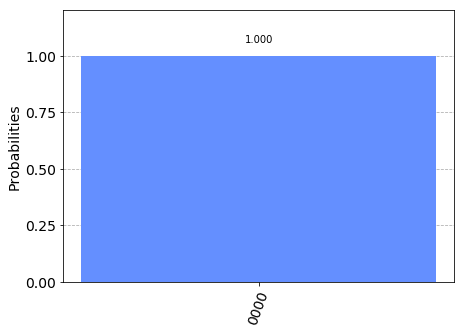

In [43]:
backend = Aer.get_backend('qasm_simulator')
result = execute(dj_circuit, backend=backend, shots=1024).result()
answer = result.get_counts()
plot_histogram(answer)